**Цели анализа:**
* определить клиента с наибольшим числом успешных операций;

* выявить платформу, на которой совершается больше всего успешных действий;

* определить, какую платформу предпочитают премиум-клиенты;

* проанализировать распределение возраста клиентов в зависимости от премиум-статуса;

* исследовать распределение числа успешных операций;

* определить возраст клиентов, совершивших наибольшее количество успешных действий на платформе computer.



**1. Импорт необходимых библиотек**

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

**1.1** Загрузка двух датасетов с информацией про пользователей

    user_data:
client – идентификатор пользователя
premium – является ли клиент премиум
age – возраст

    logs:
client – идентификатор пользователя
success – результат (успех - 1, нет - 0)
platform – платформа
time – время в формате Unix

In [3]:
user_data = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')
logs['time'] = pd.to_datetime(logs['time'])


Перевод времени из Unix формата(число секунд, прошедших с 1970 года) к более понятному

**1.2** Проверим размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [ ]:
print(
    "    Для user_data:\n"
    "Размер таблицы: {}\n"
    "Типы переменных:\n{}\n"
    "Наличие пропущенных значений:\n{}\n"
    "Описательная статистика:\n{}"
    .format(user_data.shape, user_data.dtypes, user_data.isna().sum(), user_data.describe())
)
print(
    "    Для logs:\n"
    "Размер таблицы: {}\n"
    "Типы переменных:\n{}\n"
    "Наличие пропущенных значений:\n{}\n"
    "Описательная статистика:\n{}"
    .format(logs.shape, logs.dtypes, logs.isna().sum(), logs.describe())
)

**2. Узнаем какой клиент совершил больше всего успешных операций**

In [32]:
successful_rides = logs.query('success==True')\
        .groupby('client')\
        .agg({'platform' : 'count'})\
        .sort_values('platform', ascending = False)\
        .rename(columns = {'platform' : 'successful_rides'}).reset_index()
max_successful_number = successful_rides.successful_rides.max()
max_successful_rides_clients=successful_rides.query('successful_rides == @max_successful_number')
max_successful_rides_clients

,client,successful_rides
0,36165,41
1,28719,41
2,12179,41
3,52870,41
4,61468,41
5,61473,41
6,78349,41
7,82563,41
8,92584,41


**3. Узнаем с какой платформы осуществляется наибольшее количество успешных операций**

In [33]:
logs.query('success==True').platform.value_counts().head(1).reset_index()

,platform,count
0,phone,2019


**4. Узнаем какую платформу предпочитают премиумные клиенты**
Для этого соединим два датафрейма по клиентам, выполнявших действия вне зависимости от их успешного результата, и произведем поиск.

In [58]:
data = logs.merge(user_data)
data.query('premium == True').platform.value_counts().head(1).reset_index()

,platform,count
0,phone,246


**5. Визуализируем распределение возраста клиентов в зависимости от типа клиента (премиум или нет)**

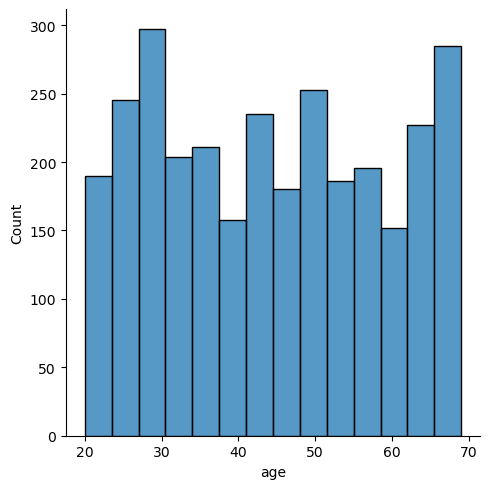

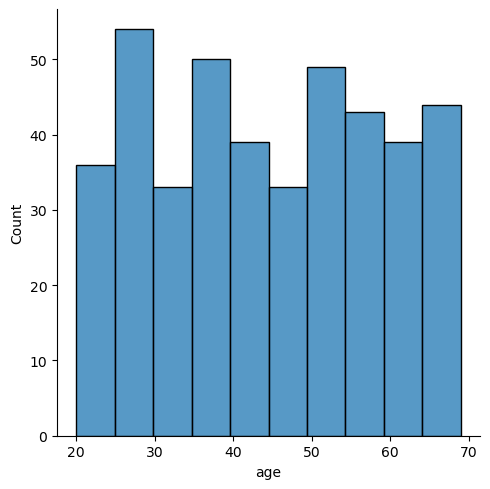

In [68]:

sns.displot(data.query('premium == False').age)
sns.displot(data.query('premium == True').age)

**6. Построим график распределения числа успешных операций**

<Axes: ylabel='Count'>

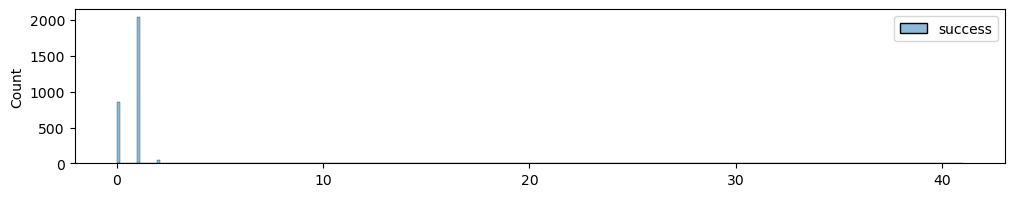

In [85]:
data_success = data.groupby('client').agg({'success': 'sum'})
plt.figure(figsize=(12,2))
sns.histplot(data_success)

**7. Визуализируем число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Узнаем клиенты какого возраста совершили наибольшее количество успешных действий**

<Axes: xlabel='age', ylabel='success'>

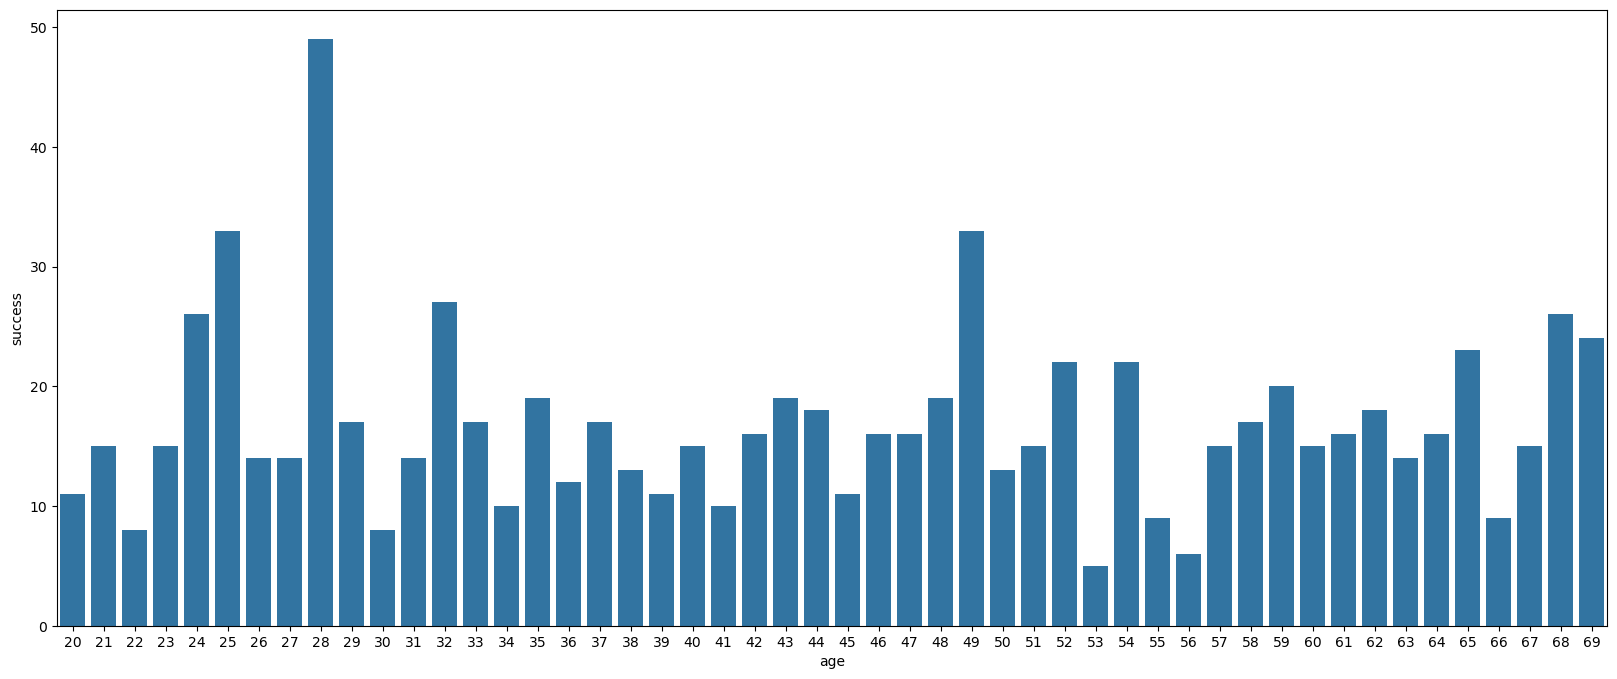

In [119]:
data_age_success = data.query('platform == "computer"').groupby('age').agg({'success' : 'sum'}).reset_index()
plt.figure(figsize=(20,8))
sns.barplot(data = data_age_success, x = 'age', y = 'success'  )



И реализация с помощью countplot:

<Axes: xlabel='age', ylabel='count'>

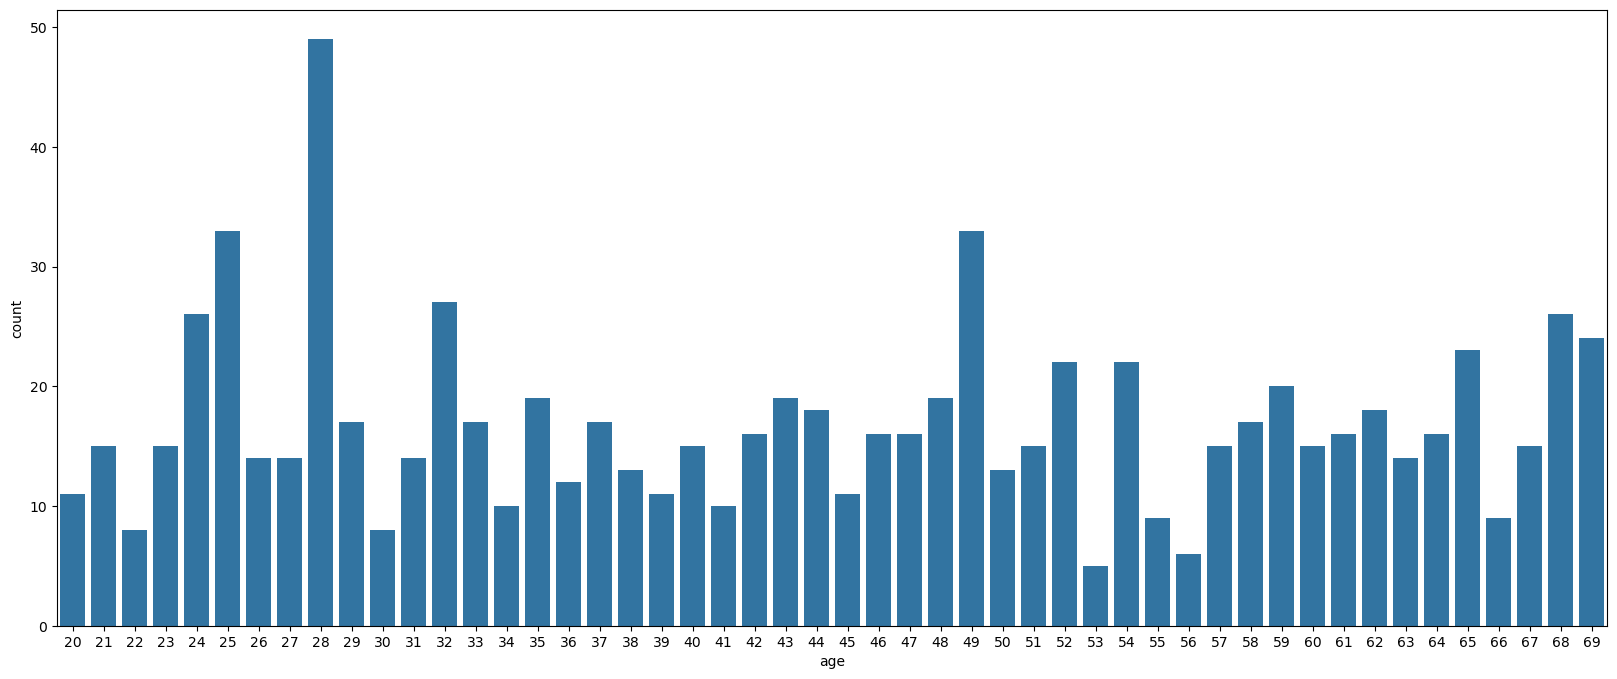

In [136]:
data_age_success=data.query('platform == "computer" and success == True')
plt.figure(figsize=(20,8))
sns.countplot(x = data_age_success.age)